In [1]:
import pandas as pd
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt


heatfile='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/B22withLTME/towarsbestREF/helpfromBL22/diagnosis/forheatmap/why_wrongTIL85/BL22LTMEtraining_all_matrix_interwith_oldSMtil'
phenfile='/Users/irffanalahi/Research/Research_update/SoftRD/hashtable_stats/B22withLTME/towarsbestREF/helpfromBL22/diagnosis/forheatmap/why_wrongTIL85/BL22LTMEtraining_Phenoclass.txt_ctrename.txt'


heatdf=pd.read_csv(heatfile,sep="\t",index_col=['chrom','start','end']) ##################
heatdf.head()

aS007DD51.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled  \
chrom start   end                                                                                                      
chr1  2259074 2259076                                              0.200                                               
      2259134 2259136                                              0.077                                               
      2259183 2259185                                              0.073                                               
      2259191 2259193                                              0.064                                               
      2259197 2259199                                              0.061                                               

                       aS007G756.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled  \
chrom start   end                                                                                                      
chr1  2259074 2259076                                              0.022                                               
      2259134 2259136                                              0.051                                               
      2259183 2259185                                              0.020                                               
      2259191 2259193                                              0.019                                               
      2259197 2259199                                              0.000                                               

                       aS009W451.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD4-T-cell.bw.bedgraph_rolled  \
chrom start   end                                                                                                      
chr1  2259074 2259076                                              0.069                                               
      2259134 2259136                                              0.103                                               
      2259183 2259185                                              0.094                                               
      2259191 2259193                                              0.071                                               
      2259197 2259199                                              0.051                                               

                       bC00256A1bs.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled  \
chrom start   end                                                                                                        
chr1  2259074 2259076                                              0.261                                                 
      2259134 2259136                                              0.184                                                 
      2259183 2259185                                              0.143                                                 
      2259191 2259193                                              0.125                                                 
      2259197 2259199                                              0.106                                                 

                       bC003VO55.CPG_methylation_calls.bs_call.GRCh38.20160531-P-naive-CD8-T-cell.bw.bedgraph_rolled  \
chrom start   end                                                                                                      
chr1  2259074 2259076                                              0.101                                               
      2259134 2259136                                              0.113                                               
      2259183 2259185                                              0.057                                               
      2259191 2259193                        

In [2]:
phendf=pd.read_csv(phenfile,sep="\t",index_col=0,header=None)
phendf.head()

,1,2,3,4,5,6,7,8,9,10,...,53,54,55,56,57,58,59,60,61,62
0,,,,,,,,,,,,,,,,,,,,,
Naive CD4,1,1,1,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Naive CD8,2,2,2,1,1,1,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Naive B cell,2,2,2,2,2,2,1,1,1,2,...,2,2,2,2,2,2,2,2,2,2
NK,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
Palsma,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


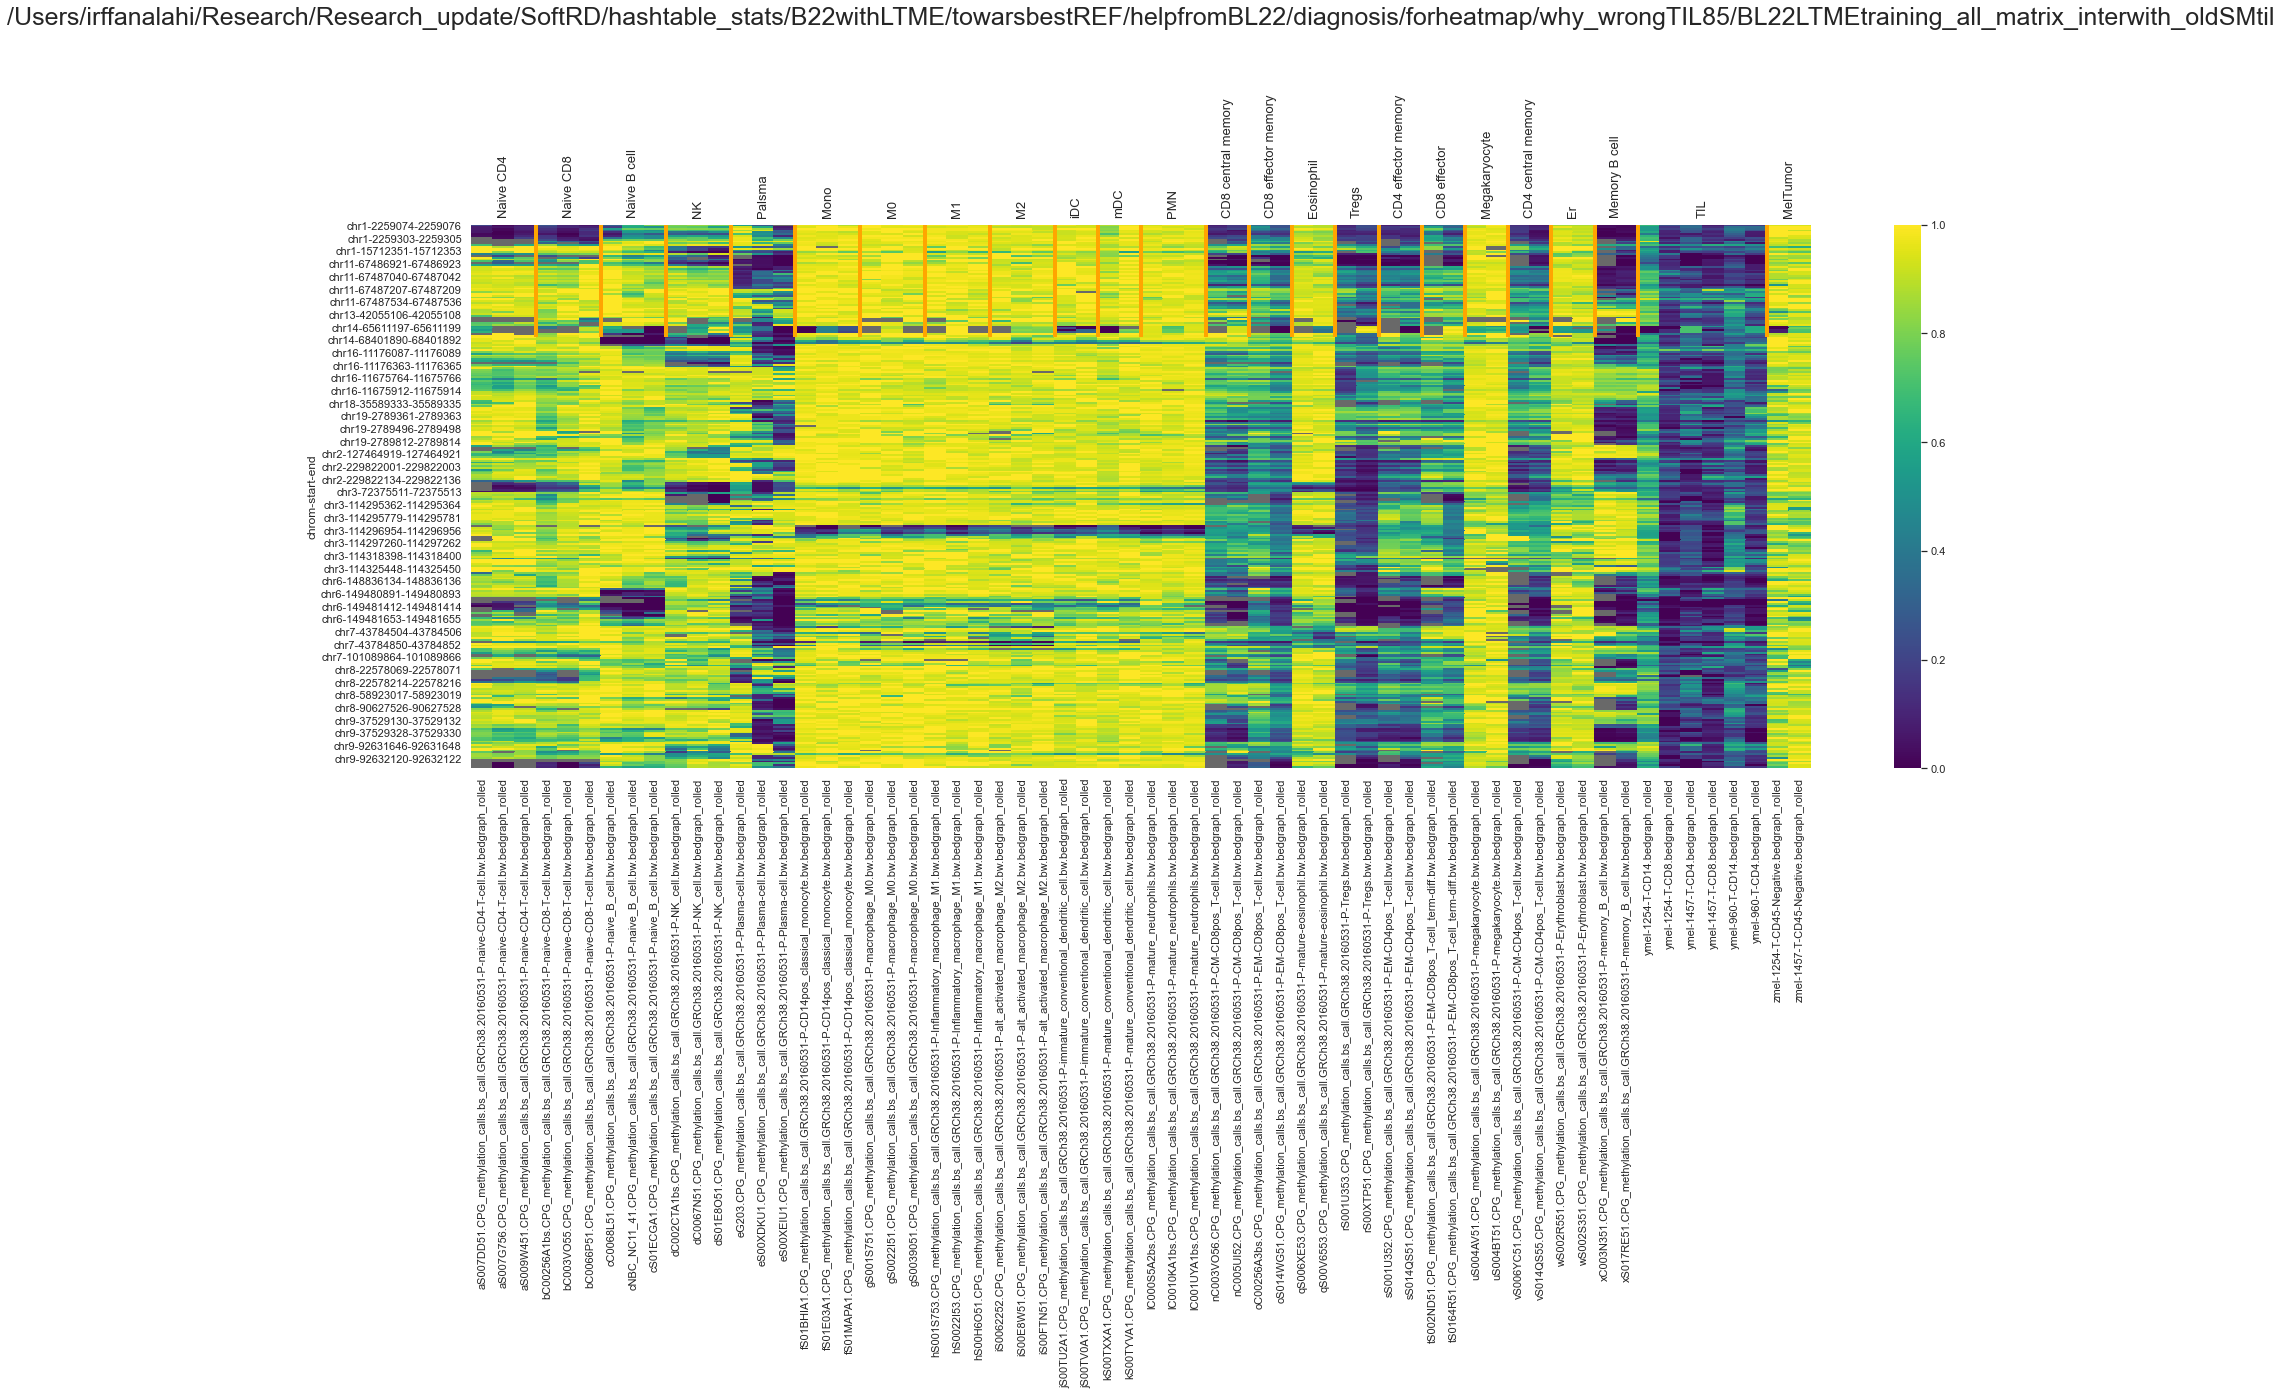

In [3]:
plt.figure(figsize=(30,10))
mycmap = plt.cm.viridis
mycmap.set_bad("dimgrey")

aaa=sns.heatmap(heatdf, cmap=mycmap)
cell_ticks = aaa.get_xticks()
phendf_T = phendf.transpose()
idx_lst = []
label_lst = []
for col in phendf_T.columns:
    col_vals = list(phendf_T[col])
    col_vals.reverse()
    idx = col_vals.index(1)
    count = col_vals.count(1)
    real_idx = len(col_vals) - idx - 1
    if count % 2 == 0:
        idx1 = real_idx - int(count / 2)
        idx2 = idx1 + 1
        label_lst.append((cell_ticks[idx1] + cell_ticks[idx2]) / 2)
    else:
        count -= 1
        count /= 2
        label_lst.append(cell_ticks[real_idx - int(count)])
    idx_lst.append(len(col_vals) - idx)
idx_lst = idx_lst[:-1]


plt.yticks(rotation=0)
plt.title(heatfile, fontsize=25, pad=200)
aaa.vlines(idx_lst, *aaa.get_xlim(), lw=4, color='orange')
for i, col in enumerate(phendf_T.columns):
    aaa.annotate(col, xy=(label_lst[i], 0.0), xytext=(0.0, 10), textcoords='offset points', fontsize=13, ha='center',rotation=90)
plt.savefig(heatfile + '_heatmap.pdf', bbox_inches='tight')